In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
def bukin_function(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)

# Define the range for x and y values
x_range = np.linspace(5, 15, 100)  # Adjust the range as needed
y_range = np.linspace(0, 10, 100)    # Adjust the range as needed

# Generate the dataset
dataset = []
for x in x_range:
    for y in y_range:
        z = bukin_function(x, y)
        dataset.append((x, y, z))

# Shuffle the dataset
np.random.shuffle(dataset)

df = pd.DataFrame(dataset, columns =['X','Y','Z'])


In [22]:
df.to_excel(r'C:\Users\manju\OneDrive\Desktop\ANN_Project\Dataset_ann.xlsx',index=False)

In [23]:
df.describe()

,X,Y,Z
count,10000.00000,10000.00000,10000.000000
mean,10.00000,5.00000,186.449699
std,2.91591,2.91591,77.967372
min,5.00000,0.00000,0.660101
25%,7.50000,2.50000,122.948932
50%,10.00000,5.00000,198.081263
75%,12.50000,7.50000,253.989705
max,15.00000,10.00000,312.399900


In [24]:
df.shape

(10000, 3)

In [25]:
df

,X,Y,Z
0,12.676768,6.262626,215.995669
1,14.696970,6.464646,207.723168
2,10.353535,8.888889,279.791302
3,7.121212,9.494949,299.968358
4,15.000000,5.656566,184.818840
...,...,...,...
9995,6.616162,7.070707,257.711713
9996,6.818182,5.555556,225.793524
9997,9.646465,1.616162,82.998567
9998,6.010101,2.121212,132.825054


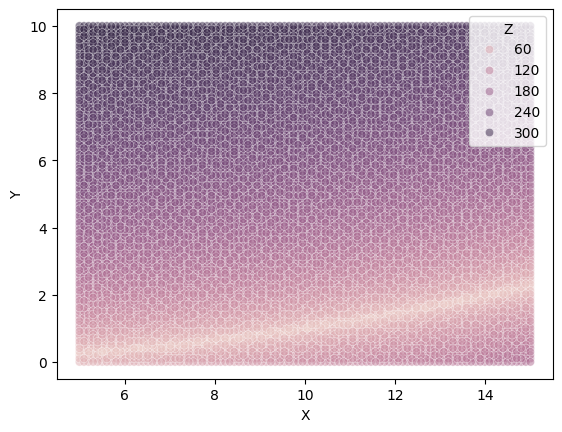

In [19]:
#Create a scatter plot to visualize the distribution of data points
_ = sns.scatterplot(
    data=df, x="X", y="Y", hue= "Z", color="black", alpha=0.5)

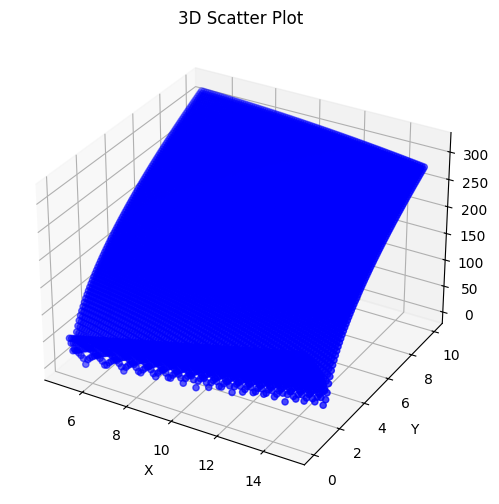

In [20]:

# Create a 3D scatter plot using Matplotlib
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['X'], df['Y'], df['Z'], c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set a title for the plot
ax.set_title('3D Scatter Plot')

plt.show()


In [7]:
#Read the data from the saved excel file and saved in 'data' dataframe
data = pd.read_excel(r'C:\Users\manju\OneDrive\Desktop\ANN_Project\Dataset_ann.xlsx')

In [25]:
data

,X,Y,Z
0,12.676768,6.262626,215.995669
1,14.696970,6.464646,207.723168
2,10.353535,8.888889,279.791302
3,7.121212,9.494949,299.968358
4,15.000000,5.656566,184.818840
...,...,...,...
9995,6.616162,7.070707,257.711713
9996,6.818182,5.555556,225.793524
9997,9.646465,1.616162,82.998567
9998,6.010101,2.121212,132.825054


In [8]:
# Split the data into inputs (X and Y) and output (Z)
inputs = data[['X', 'Y']]
output = data['Z']

# Display the first few rows of the input and output DataFrames
print("Inputs:")
print(inputs.head())
print("\nOutput:")
print(output.head())

Inputs:
           X         Y
0  12.676768  6.262626
1  14.696970  6.464646
2  10.353535  8.888889
3   7.121212  9.494949
4  15.000000  5.656566

Output:
0    215.995669
1    207.723168
2    279.791302
3    299.968358
4    184.818840
Name: Z, dtype: float64


In [9]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the input data
X_normalized = scaler.fit_transform(inputs)
Z_normalized = scaler.fit_transform(output.values.reshape(-1, 1))

# Display the first few rows of the normalized input data
print("Normalized Inputs:")
print(X_normalized[:20])
print("Normalized Output:")
print(Z_normalized[:20])


Normalized Inputs:
[[0.76767677 0.62626263]
 [0.96969697 0.64646465]
 [0.53535354 0.88888889]
 [0.21212121 0.94949495]
 [1.         0.56565657]
 [0.46464646 0.26262626]
 [0.65656566 0.19191919]
 [0.8989899  0.75757576]
 [0.80808081 0.17171717]
 [0.27272727 0.08080808]
 [0.32323232 0.11111111]
 [0.04040404 0.54545455]
 [0.53535354 0.02020202]
 [0.50505051 0.78787879]
 [0.25252525 0.57575758]
 [0.53535354 0.75757576]
 [0.24242424 0.81818182]
 [0.19191919 0.68686869]
 [0.72727273 0.13131313]
 [0.12121212 0.77777778]]
Normalized Output:
[[0.69075418]
 [0.66421762]
 [0.89539803]
 [0.96012206]
 [0.59074504]
 [0.41623229]
 [0.2431991 ]
 [0.7590155 ]
 [0.02366909]
 [0.14579149]
 [0.20964701]
 [0.72722666]
 [0.29772854]
 [0.83923104]
 [0.72932295]
 [0.81660711]
 [0.88455177]
 [0.80930408]
 [0.13954593]
 [0.87054017]]


In [10]:
#Split the data into training (70%) and temporary (30%) sets:
X_train, X_temp, Z_train, Z_temp = train_test_split(X_normalized, Z_normalized, test_size=0.30, random_state=45)


In [11]:
#Split the temporary data into validation (50%) and testing (50%) sets:
X_val, X_test, Z_val, Z_test = train_test_split(X_temp, Z_temp, test_size=0.50, random_state=45)

In [12]:
# Define the model
model_adam = keras.Sequential()

In [13]:
print(X_train.shape)

(7000, 2)


In [14]:
# Input layer
model_adam.add(layers.Input(shape=(X_train.shape[1],)))

In [15]:
# First hidden layer with ReLU activation
model_adam.add(layers.Dense(12, input_dim=2, activation='relu'))

# Second hidden layer with ReLU activation
model_adam.add(layers.Dense(8, activation='relu'))

# Output layer with a linear activation (for regression)
model_adam.add(layers.Dense(1, activation='linear'))


In [16]:
#viewing the architecture
print(model_adam.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 149 (596.00 Byte)
Trainable params: 149 (596.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
# Compile the model
model_adam.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [18]:
# Train the model using the training data and validate it using the validation data
history = model_adam.fit(X_train, Z_train, epochs=100, validation_data=(X_val, Z_val))

Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 0.1438 - mean_squared_error: 0.1438 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/100
219/219 [=

In [19]:
# predictions on the training data
Z_train_pred_adam = model_adam.predict(X_train)

# Calculate Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Z_train, Z_train_pred_adam)

# Calculate R-squared (R2) for training data
r2_train = r2_score(Z_train, Z_train_pred_adam)

# Report the results
print(f"Mean Squared Error (MSE) for Training Data (adam optimisation): {mse_train}")
print(f"R-squared (R2) for Training Data (adam optimisation): {r2_train}")


219/219 [==============================] - 1s 2ms/step
Mean Squared Error (MSE) for Training Data (adam optimisation): 8.092587750363288e-05
R-squared (R2) for Training Data (adam optimisation): 0.9986910746776955


In [20]:
# Evaluate the model on the test data
test_loss, test_mse = model_adam.evaluate(X_test, Z_test)
print(f'Mean squared error (MSE) for Testing data (adam optimisation): {test_mse}')

47/47 [==============================] - 0s 2ms/step - loss: 8.2260e-05 - mean_squared_error: 8.2260e-05
Mean squared error (MSE) for Testing data (adam optimisation): 8.226020145229995e-05


In [21]:
#predictions on the testing data
Z_test_pred_adam = model_adam.predict(X_test)

# Calculate R-squared (R2) for testing data
r2_test = r2_score(Z_test, Z_test_pred_adam)

# Report the result
print(f"R-squared (R2) for Testing Data: {r2_test}")

47/47 [==============================] - 0s 2ms/step
R-squared (R2) for Testing Data: 0.9986976075182593


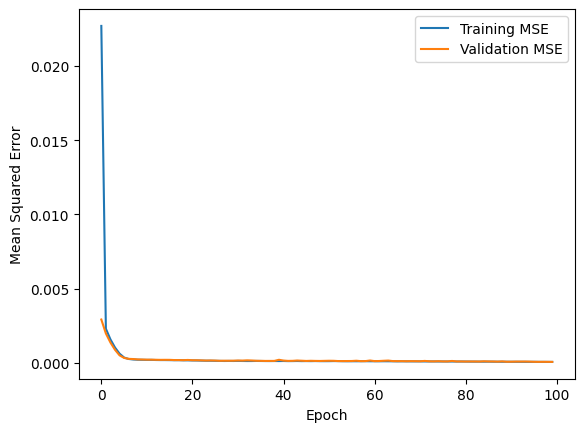

In [57]:
#plot training and validation curves
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

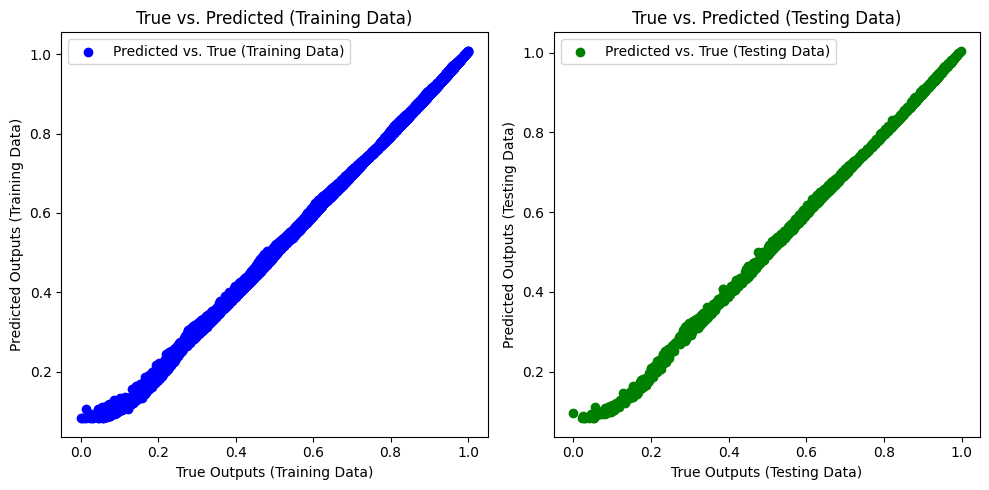

In [58]:
# Create a scatter plot for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(Z_train, Z_train_pred_adam, c='blue', label='Predicted vs. True (Training Data)')
plt.xlabel('True Outputs (Training Data)')
plt.ylabel('Predicted Outputs (Training Data)')
plt.title('True vs. Predicted (Training Data)')
plt.legend()

# Create a scatter plot for the testing data
plt.subplot(1, 2, 2)
plt.scatter(Z_test, Z_test_pred_adam, c='green', label='Predicted vs. True (Testing Data)')
plt.xlabel('True Outputs (Testing Data)')
plt.ylabel('Predicted Outputs (Testing Data)')
plt.title('True vs. Predicted (Testing Data)')
plt.legend()

plt.tight_layout()

# Show the plots
plt.show()

In [59]:
# Create a new model with the RMSprop optimizer
model_rmsprop = keras.Sequential()
model_rmsprop.add(layers.Input(shape=(X_train.shape[1],)))

In [60]:
model_rmsprop.add(layers.Dense(12, input_dim=2, activation='relu'))
model_rmsprop.add(layers.Dense(8, activation='relu'))
model_rmsprop.add(layers.Dense(1, activation='linear'))

In [61]:
#viewing the architecture
print(model_rmsprop.summary())

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 12)                36        
                                                                 
 dense_80 (Dense)            (None, 8)                 104       
                                                                 
 dense_81 (Dense)            (None, 1)                 9         
                                                                 
Total params: 149 (596.00 Byte)
Trainable params: 149 (596.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [62]:
# Compile the model with RMSprop optimizer
model_rmsprop.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error'])

In [63]:
# Train the model with RMSprop
history = model_rmsprop.fit(X_train, Z_train, epochs=100, validation_data=(X_val, Z_val))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 7/100
219/219 [=

In [64]:
# predictions on the training data
Z_rmsprop_train_pred = model_rmsprop.predict(X_train)

# Calculate Mean Squared Error (MSE) for training data
mse_rmsprop_train = mean_squared_error(Z_train, Z_rmsprop_train_pred)

# Calculate R-squared (R2) for training data
r2_rmsprop_train = r2_score(Z_train, Z_rmsprop_train_pred)

# Report the results
print(f"Mean Squared Error (MSE) for Training Data: {mse_rmsprop_train}")
print(f"R-squared (R2) for Training Data: {r2_rmsprop_train}")


219/219 [==============================] - 0s 1ms/step
Mean Squared Error (MSE) for Training Data: 0.00011184473595827595
R-squared (R2) for Training Data: 0.9981909815305285


In [65]:
#predictions on the testing data
Z_rmsprop_test_pred = model_rmsprop.predict(X_test)

# Calculate R-squared (R2) for testing data
r2_rmsprop_test = r2_score(Z_test, Z_rmsprop_test_pred)

# Report the result
print(f"R-squared (R2) for Testing Data: {r2_test}")

47/47 [==============================] - 0s 995us/step
R-squared (R2) for Testing Data: 0.9989594398251606


In [76]:
# Evaluate the model on the test data
test_mse_rmsprop = model_rmsprop.evaluate(X_test, Z_test)
print(f'Mean squared error (MSE) for Testing data: {test_mse_rmsprop}')


47/47 [==============================] - 0s 1ms/step - loss: 1.0845e-04 - mean_squared_error: 1.0845e-04
Mean squared error (MSE) for Testing data: [0.00010845190263353288, 0.00010845190263353288]


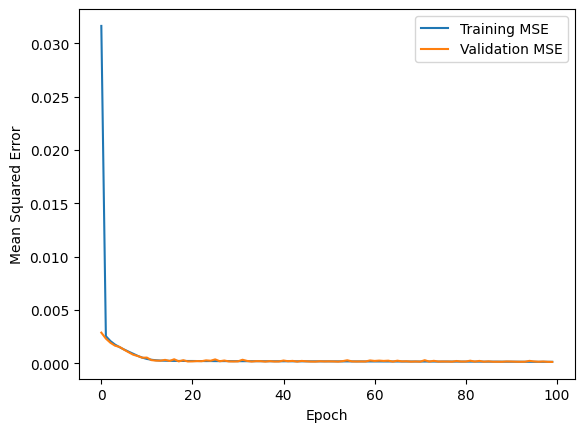

In [67]:
#plot training and validation curves
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

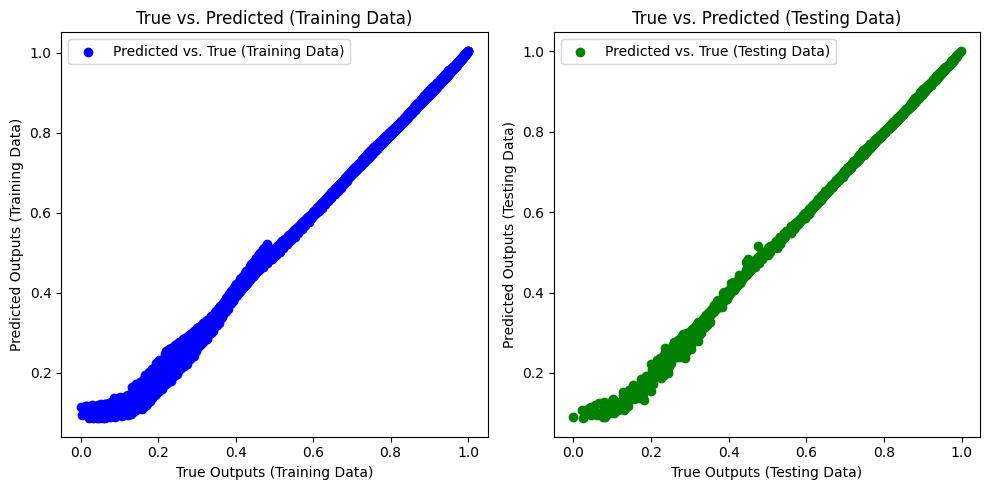

In [68]:
# Create a scatter plot for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(Z_train, Z_rmsprop_train_pred, c='blue', label='Predicted vs. True (Training Data)')
plt.xlabel('True Outputs (Training Data)')
plt.ylabel('Predicted Outputs (Training Data)')
plt.title('True vs. Predicted (Training Data)')
plt.legend()

# Create a scatter plot for the testing data
plt.subplot(1, 2, 2)
plt.scatter(Z_test, Z_rmsprop_test_pred, c='green', label='Predicted vs. True (Testing Data)')
plt.xlabel('True Outputs (Testing Data)')
plt.ylabel('Predicted Outputs (Testing Data)')
plt.title('True vs. Predicted (Testing Data)')
plt.legend()

plt.tight_layout()

# Show the plots
plt.show()

In [71]:
import pandas as pd

# Create a DataFrame to compare the results
results = pd.DataFrame({
    'Optimizer': ['Adam', 'RMSProp'],
    'MSE (Training)': [mse_train, mse_rmsprop_train],
    'MSE (Testing)': [test_mse, test_loss],
    'R-squared (Training)': [r2_train, r2_rmsprop_train],
    'R-squared (Testing)': [r2_test, r2_rmsprop_test]
})

# Display the comparison
print(results)


  Optimizer  MSE (Training)                                     MSE (Testing)  \
0      Adam        0.000063                                          0.000066   
1   RMSProp        0.000112  [0.00010845190263353288, 0.00010845190263353288]   

   R-squared (Training)  R-squared (Testing)  
0              0.998985             0.998959  
1              0.998191             0.998283  


In [77]:
mse_rmsprop_test = float(0.00010845190263353288)

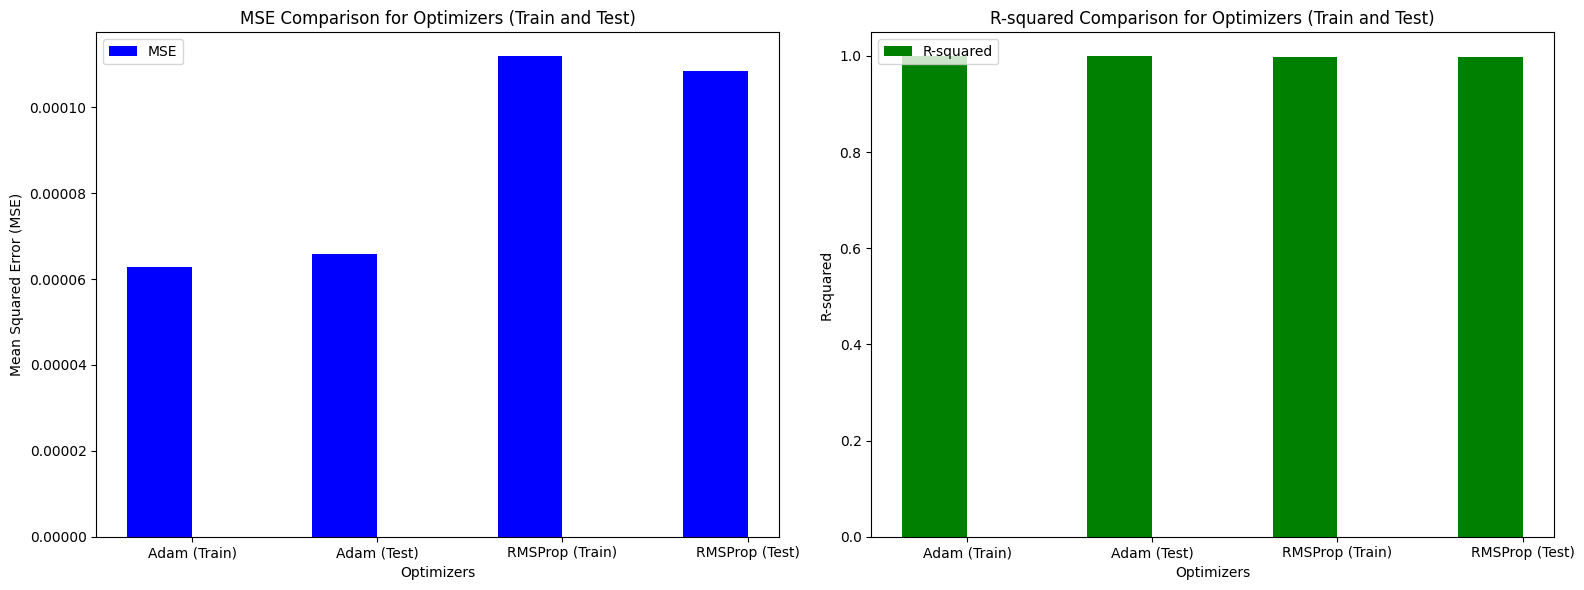

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
optimizers = ['Adam (Train)', 'Adam (Test)', 'RMSProp (Train)', 'RMSProp (Test)']
mse_values = [mse_train, test_mse, mse_rmsprop_train, mse_rmsprop_test]
r2_values = [r2_train, r2_test, r2_rmsprop_train, r2_rmsprop_test]

# Create subplots for MSE and R-squared
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

bar_width = 0.35
index = np.arange(len(optimizers))

# Plot the MSE values in the first subplot
ax1.bar(index, mse_values, bar_width, color='blue', label='MSE')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(optimizers)
ax1.set_xlabel('Optimizers')
ax1.set_title('MSE Comparison for Optimizers (Train and Test)')

# Plot the R-squared values in the second subplot
ax2.bar(index, r2_values, bar_width, color='green', label='R-squared')
ax2.set_ylabel('R-squared')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(optimizers)
ax2.set_xlabel('Optimizers')
ax2.set_title('R-squared Comparison for Optimizers (Train and Test)')

# Add a legend to both subplots
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 7.9547e-04 - mean_squared_error: 7.9547e-04 - val_loss: 5.7483e-04 - val_mean_squared_error: 5.7483e-04
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 3.9800e-04 - mean_squared_error: 3.9800e-04 - val_loss: 3.4666e-04 - val_mean_squared_error: 3.4666e-04
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 2.5975e-04 - mean_squared_error: 2.5975e-04 - val_loss: 2.6487e-04 - val_mean_

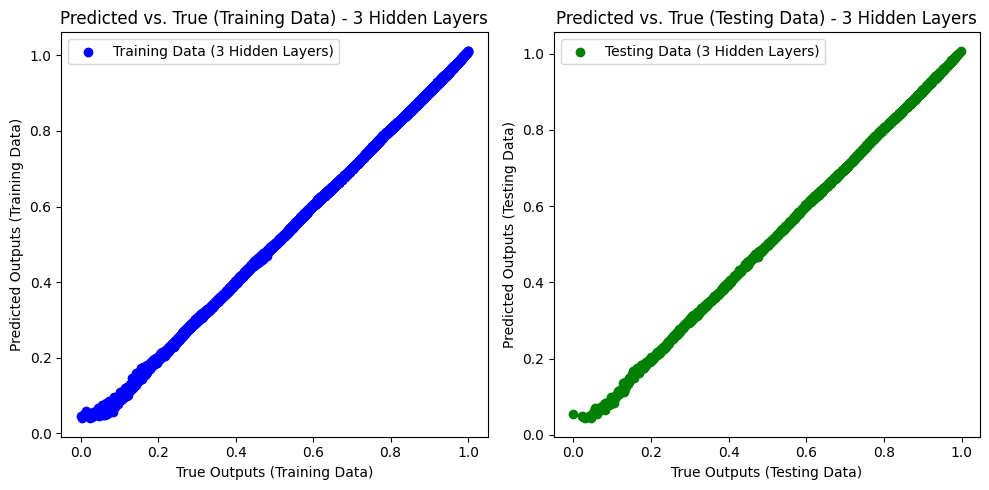

Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 7/100
219/219 [=

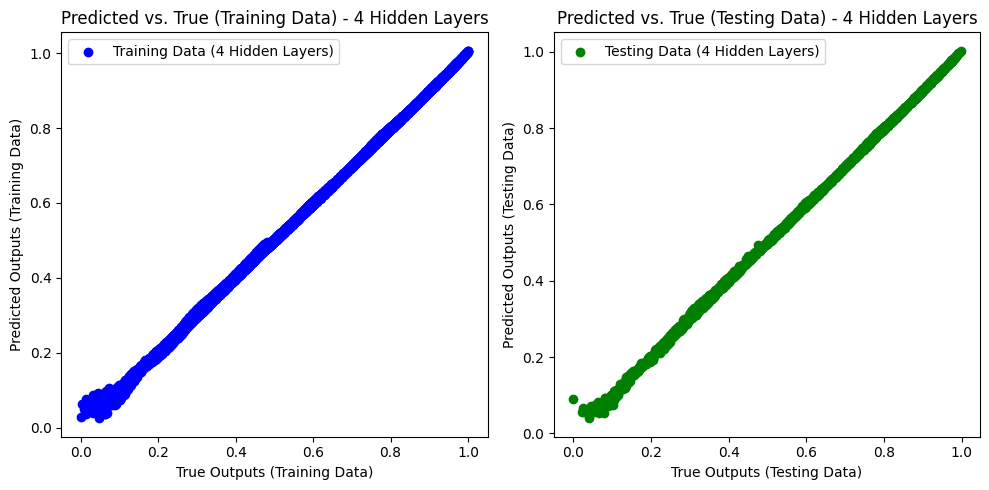

Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 6.4262e-04 - mean_squared_error: 6.4262e-04 - val_loss: 4.9626e-04 - val_mean_squared_error: 4.9626e-04
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 3.5462e-04 - mean_squared_error: 3.5462e-04 - val_loss: 2.9874e-04 - val_mean_squared_error: 2

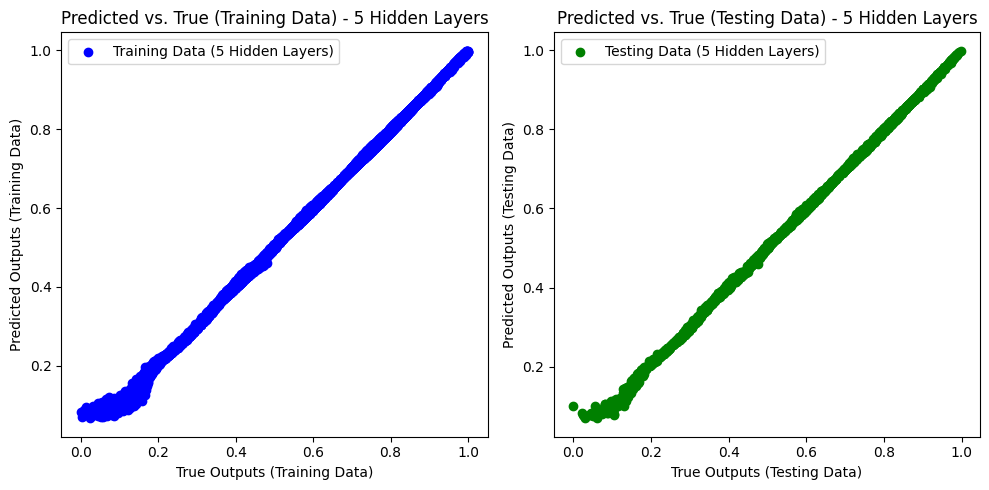

In [74]:
# Define a function to create models with varying numbers of hidden layers
def create_model(input_shape, num_hidden_layers, num_nodes, activation='relu'):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))

    # Add the desired number of hidden layers to the model
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(num_nodes, activation=activation))

    # Output layer with one node and linear activation for regression
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    return model

# Define the input shape based on your data
input_shape = X_train.shape[1] 

# Define a list of different numbers of hidden layers to experiment with
num_hidden_layers_list = [3, 4, 5]

# Create lists to store MSE and R-squared values for training and testing data
train_mse_list = []
train_r2_list = []
test_mse_list = []
test_r2_list = []

# Create a loop to train models with different numbers of hidden layers
for num_hidden_layers in num_hidden_layers_list:
    # Create a new model with the specified number of hidden layers
    model = create_model(input_shape, num_hidden_layers, num_nodes=12, activation='relu')

    # Train the model with your data
    history = model.fit(X_train, Z_train, epochs=100, validation_data=(X_val, Z_val))

    # Evaluate the model and plot the results
    Z_train_pred = model.predict(X_train)
    Z_test_pred = model.predict(X_test)

    # Calculate and append MSE and R-squared values
    train_mse = mean_squared_error(Z_train, Z_train_pred)
    train_r2 = r2_score(Z_train, Z_train_pred)
    test_mse = mean_squared_error(Z_test, Z_test_pred)
    test_r2 = r2_score(Z_test, Z_test_pred)

    train_mse_list.append(train_mse)
    train_r2_list.append(train_r2)
    test_mse_list.append(test_mse)
    test_r2_list.append(test_r2)

    # Create scatter plots for predicted vs. true outputs (both training and testing data)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(Z_train, Z_train_pred, c='blue', label=f'Training Data ({num_hidden_layers} Hidden Layers)')
    plt.xlabel('True Outputs (Training Data)')
    plt.ylabel('Predicted Outputs (Training Data)')
    plt.title(f'Predicted vs. True (Training Data) - {num_hidden_layers} Hidden Layers')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(Z_test, Z_test_pred, c='green', label=f'Testing Data ({num_hidden_layers} Hidden Layers)')
    plt.xlabel('True Outputs (Testing Data)')
    plt.ylabel('Predicted Outputs (Testing Data)')
    plt.title(f'Predicted vs. True (Testing Data) - {num_hidden_layers} Hidden Layers')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [75]:
# Print MSE and R-squared values for training and testing data for each model configuration
for i, num_hidden_layers in enumerate(num_hidden_layers_list):
    print(f"Number of Hidden Layers: {num_hidden_layers}")
    print(f"Training MSE: {train_mse_list[i]}")
    print(f"Training R-squared (R^2): {train_r2_list[i]}")
    print(f"Testing MSE: {test_mse_list[i]}")
    print(f"Testing R-squared (R^2): {test_r2_list[i]}")
    print("\n")

Number of Hidden Layers: 3
Training MSE: 1.5872349010977104e-05
Training R-squared (R^2): 0.9997432747078462
Testing MSE: 1.6754263221393852e-05
Testing R-squared (R^2): 0.9997347366031685


Number of Hidden Layers: 4
Training MSE: 2.2740918691596168e-05
Training R-squared (R^2): 0.9996321799003469
Testing MSE: 2.5682264232571684e-05
Testing R-squared (R^2): 0.9995933832148489


Number of Hidden Layers: 5
Training MSE: 4.106707543534562e-05
Training R-squared (R^2): 0.9993357658068286
Testing MSE: 4.290493794011746e-05
Testing R-squared (R^2): 0.9993207036663773




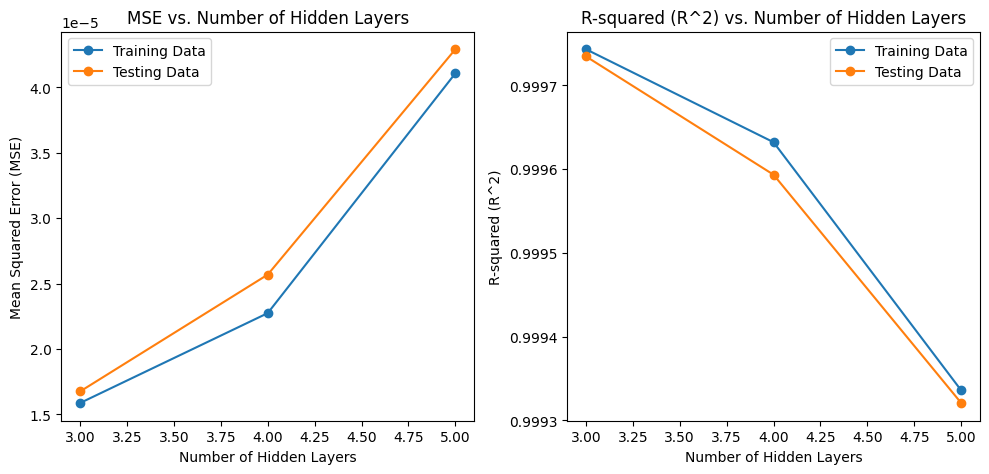

In [76]:
import matplotlib.pyplot as plt

# Plot MSE for training and testing data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_hidden_layers_list, train_mse_list, marker='o', label='Training Data')
plt.plot(num_hidden_layers_list, test_mse_list, marker='o', label='Testing Data')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Hidden Layers')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_hidden_layers_list, train_r2_list, marker='o', label='Training Data')
plt.plot(num_hidden_layers_list, test_r2_list, marker='o', label='Testing Data')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('R-squared (R^2)')
plt.title('R-squared (R^2) vs. Number of Hidden Layers')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Define a function to create models with varying numbers of hidden nodes
def create_model(input_shape, num_hidden_nodes, activation='relu'):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))

    # Add a hidden layer with the specified number of nodes
    model.add(layers.Dense(num_hidden_nodes, activation=activation))

    # Output layer with one node and linear activation for regression
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    return model

In [12]:
# Define the input shape based on your data
input_shape = X_train.shape[1]  # Replace with the appropriate input shape

# Define a list of different numbers of hidden nodes to experiment with
num_hidden_nodes_list = [8, 16, 32]

# Create lists to store MSE and R-squared values for training and testing data
train_mse_list = []
train_r2_list = []
test_mse_list = []
test_r2_list = []



Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7/100
219/219 [=

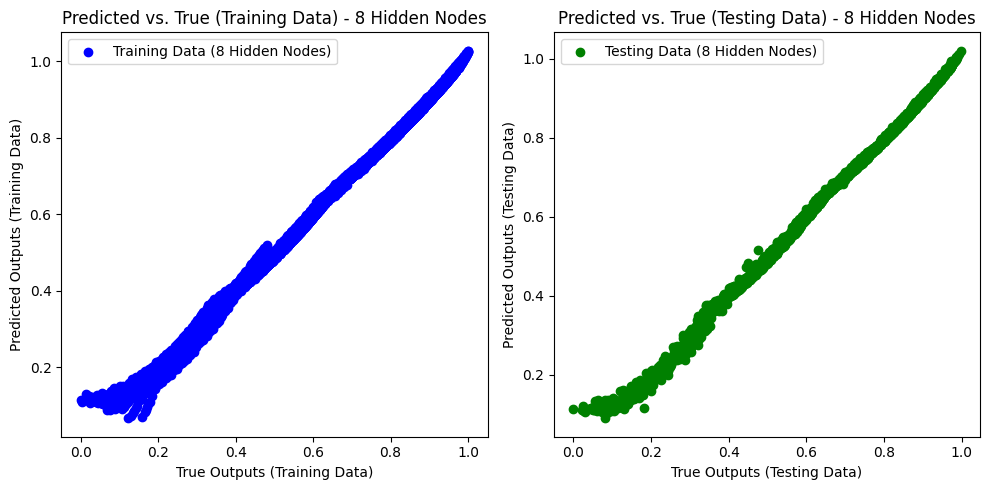

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 0.2733 - mean_squared_error: 0.2733 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0702 - val_mean_squared_error: 0.0702
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 7/100
219/219 [=

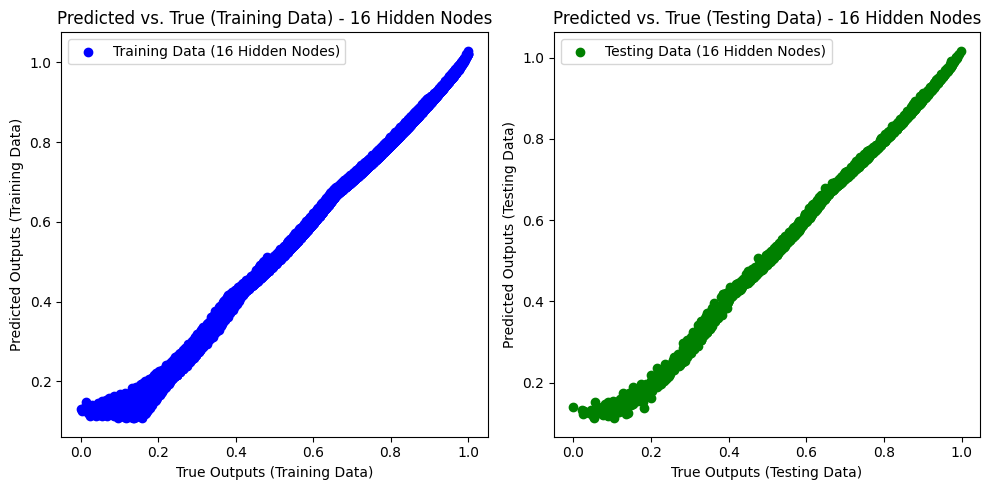

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7/100
219/219 [=

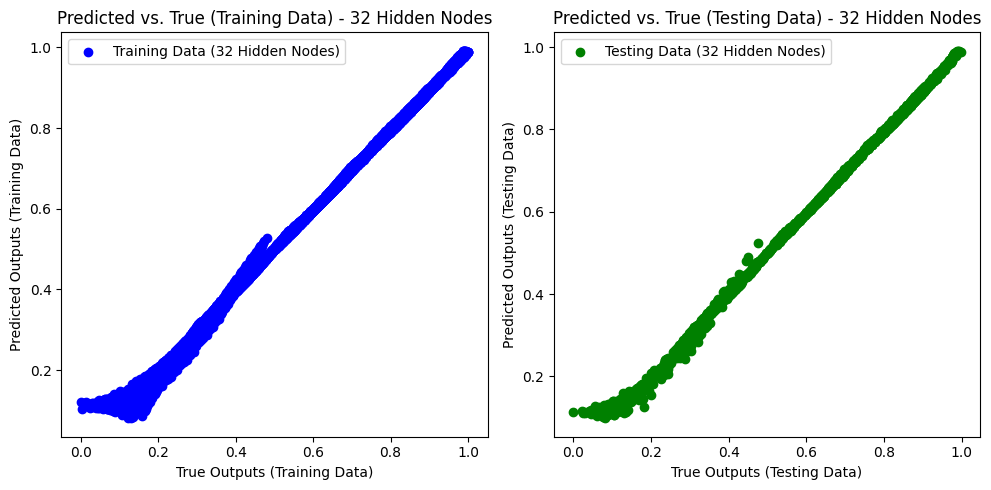

In [13]:
# Create a loop to train models with different numbers of hidden nodes
for num_hidden_nodes in num_hidden_nodes_list:
    # Create a new model with the specified number of hidden nodes
    model = create_model(input_shape, num_hidden_nodes, activation='relu')

    # Train the model with your data
    history = model.fit(X_train, Z_train, epochs=100, batch_size=32, validation_data=(X_val, Z_val))

    # Predict on training and testing data
    Z_train_pred = model.predict(X_train)
    Z_test_pred = model.predict(X_test)

    # Calculate and append MSE and R-squared values
    train_mse = mean_squared_error(Z_train, Z_train_pred)
    train_r2 = r2_score(Z_train, Z_train_pred)
    test_mse = mean_squared_error(Z_test, Z_test_pred)
    test_r2 = r2_score(Z_test, Z_test_pred)

    train_mse_list.append(train_mse)
    train_r2_list.append(train_r2)
    test_mse_list.append(test_mse)
    test_r2_list.append(test_r2)

    # Print metric values for the current configuration
    print(f"Number of Hidden Nodes: {num_hidden_nodes}")
    print(f"Training MSE: {train_mse}")
    print(f"Training R-squared (R^2): {train_r2}")
    print(f"Testing MSE: {test_mse}")
    print(f"Testing R-squared (R^2): {test_r2}")
    print("\n")

    # Create a plot to visualize the training and testing data results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(Z_train, Z_train_pred, c='blue', label=f'Training Data ({num_hidden_nodes} Hidden Nodes)')
    plt.xlabel('True Outputs (Training Data)')
    plt.ylabel('Predicted Outputs (Training Data)')
    plt.title(f'Predicted vs. True (Training Data) - {num_hidden_nodes} Hidden Nodes')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(Z_test, Z_test_pred, c='green', label=f'Testing Data ({num_hidden_nodes} Hidden Nodes)')
    plt.xlabel('True Outputs (Testing Data)')
    plt.ylabel('Predicted Outputs (Testing Data)')
    plt.title(f'Predicted vs. True (Testing Data) - {num_hidden_nodes} Hidden Nodes')
    plt.legend()

    plt.tight_layout()
    plt.show()

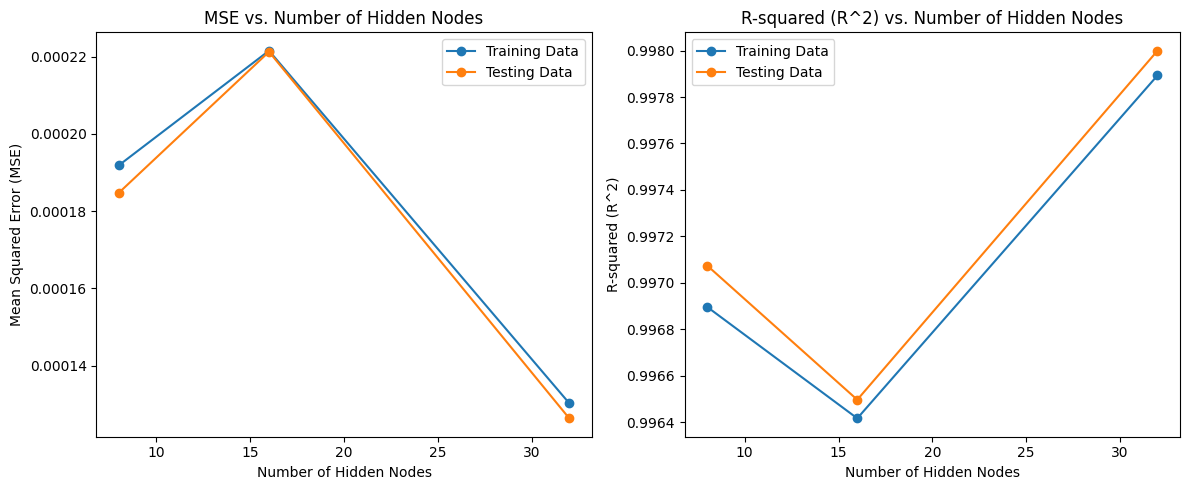

In [14]:
# Create plots to visualize how the metrics change with different numbers of hidden nodes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(num_hidden_nodes_list, train_mse_list, marker='o', label='Training Data')
plt.plot(num_hidden_nodes_list, test_mse_list, marker='o', label='Testing Data')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Hidden Nodes')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_hidden_nodes_list, train_r2_list, marker='o', label='Training Data')
plt.plot(num_hidden_nodes_list, test_r2_list, marker='o', label='Testing Data')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('R-squared (R^2)')
plt.title('R-squared (R^2) vs. Number of Hidden Nodes')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
# Define a function to create models with a specified number of epochs
def create_model(input_shape, num_epochs, num_nodes=16, activation='relu'):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))  # Define input shape

    # Add a hidden layer with the specified number of nodes
    model.add(layers.Dense(num_nodes, activation=activation))

    # Output layer with one node and linear activation for regression
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    return model


In [23]:
# Define the input shape based on your data
input_shape = X_train.shape[1]  # Replace with the appropriate input shape

# Define a list of different numbers of epochs to experiment with
num_epochs_list = [60, 120, 180]

# Create lists to store MSE and R-squared values for training and testing data
train_mse_list = []
train_r2_list = []
test_mse_list = []
test_r2_list = []

Epoch 1/60
219/219 [==============================] - 2s 4ms/step - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2/60
219/219 [==============================] - 1s 3ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 3/60
219/219 [==============================] - 1s 3ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 4/60
219/219 [==============================] - 1s 3ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/60
219/219 [==============================] - 1s 3ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/60
219/219 [==============================] - 1s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7/60
219/219 [========

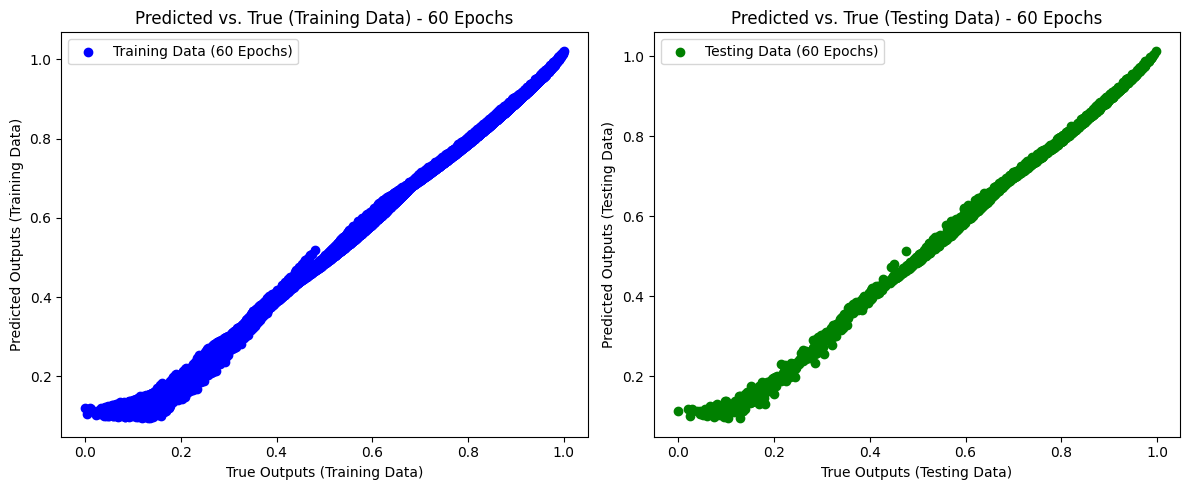

Epoch 1/120
219/219 [==============================] - 2s 4ms/step - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 2/120
219/219 [==============================] - 1s 3ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/120
219/219 [==============================] - 1s 3ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/120
219/219 [==============================] - 1s 3ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5/120
219/219 [==============================] - 1s 3ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6/120
219/219 [==============================] - 1s 3ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7/120
219/219 [=

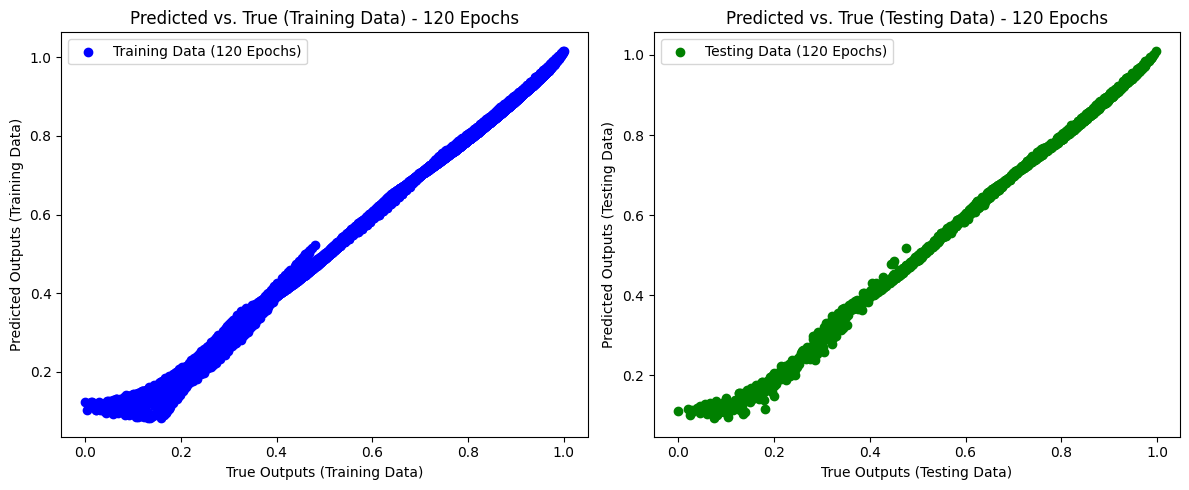

Epoch 1/180
219/219 [==============================] - 2s 4ms/step - loss: 0.2848 - mean_squared_error: 0.2848 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 2/180
219/219 [==============================] - 1s 3ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 3/180
219/219 [==============================] - 1s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4/180
219/219 [==============================] - 1s 3ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/180
219/219 [==============================] - 1s 3ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6/180
219/219 [==============================] - 1s 3ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 7/180
219/219 [=

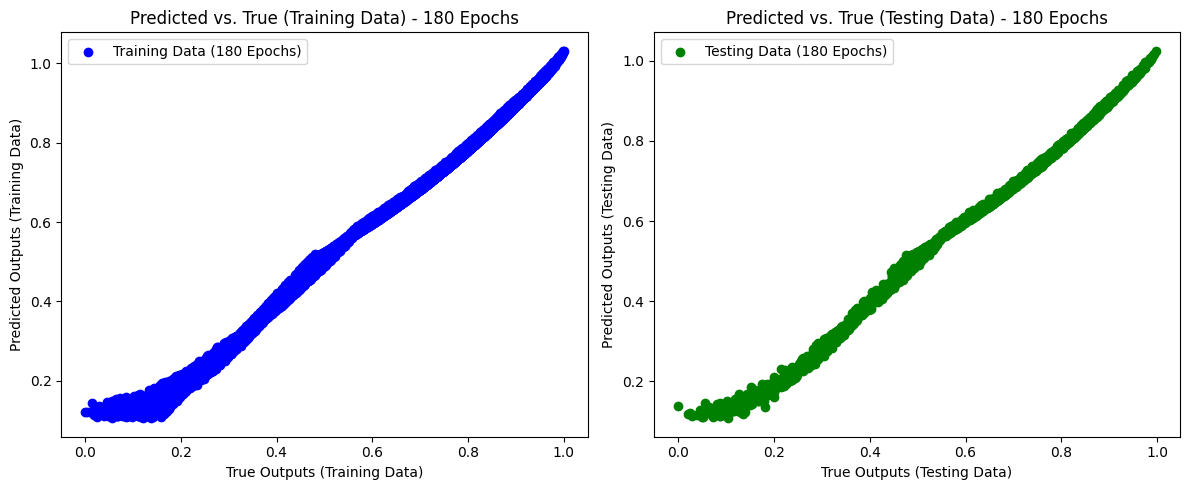

In [24]:
for num_epochs in num_epochs_list:
    # Create a new model with the specified number of epochs
    model = create_model(input_shape, num_epochs, num_nodes=16, activation='relu')

    # Train the model with your data
    history = model.fit(X_train, Z_train, epochs=num_epochs, validation_data=(X_val, Z_val))

    # Predict on training and testing data
    Z_train_pred = model.predict(X_train)
    Z_test_pred = model.predict(X_test)

    # Calculate and append MSE and R-squared values
    train_mse = mean_squared_error(Z_train, Z_train_pred)
    train_r2 = r2_score(Z_train, Z_train_pred)
    test_mse = mean_squared_error(Z_test, Z_test_pred)
    test_r2 = r2_score(Z_test, Z_test_pred)

    train_mse_list.append(train_mse)
    train_r2_list.append(train_r2)
    test_mse_list.append(test_mse)
    test_r2_list.append(test_r2)

    # Print metric values for the current configuration
    print(f"Number of Epochs: {num_epochs}")
    print(f"Training MSE: {train_mse}")
    print(f"Training R-squared (R^2): {train_r2}")
    print(f"Testing MSE: {test_mse}")
    print(f"Testing R-squared (R^2): {test_r2}")
    print("\n")

    # Create scatter plots to visualize predicted vs. true output in training and testing data
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(Z_train, Z_train_pred, c='blue', label=f'Training Data ({num_epochs} Epochs)')
    plt.xlabel('True Outputs (Training Data)')
    plt.ylabel('Predicted Outputs (Training Data)')
    plt.title(f'Predicted vs. True (Training Data) - {num_epochs} Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(Z_test, Z_test_pred, c='green', label=f'Testing Data ({num_epochs} Epochs)')
    plt.xlabel('True Outputs (Testing Data)')
    plt.ylabel('Predicted Outputs (Testing Data)')
    plt.title(f'Predicted vs. True (Testing Data) - {num_epochs} Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()


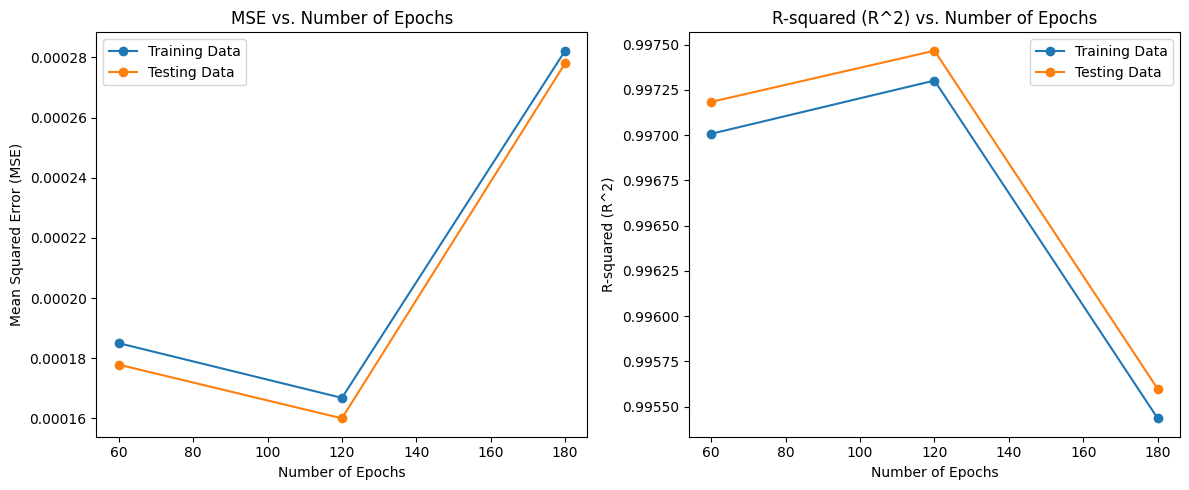

In [25]:
# Create plots to visualize how the metrics change with different numbers of epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(num_epochs_list, train_mse_list, marker='o', label='Training Data')
plt.plot(num_epochs_list, test_mse_list, marker='o', label='Testing Data')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_epochs_list, train_r2_list, marker='o', label='Training Data')
plt.plot(num_epochs_list, test_r2_list, marker='o', label='Testing Data')
plt.xlabel('Number of Epochs')
plt.ylabel('R-squared (R^2)')
plt.title('R-squared (R^2) vs. Number of Epochs')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2317 - mean_squared_error: 0.2317 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/100
219/219 [=

<Figure size 1200x500 with 0 Axes>

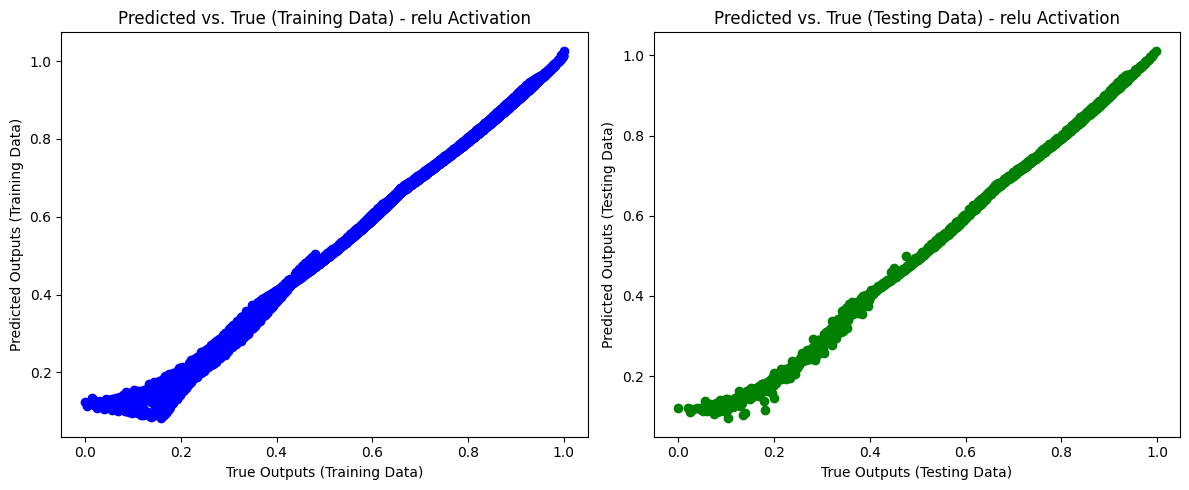

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1556 - mean_squared_error: 0.1556 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 7/100
219/219 [=

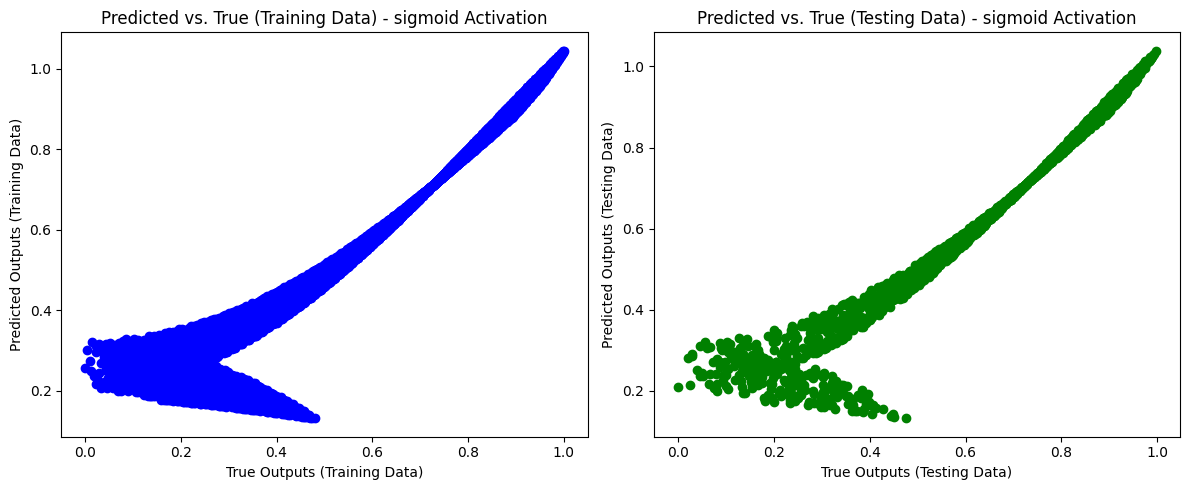

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 7/100
219/219 [=

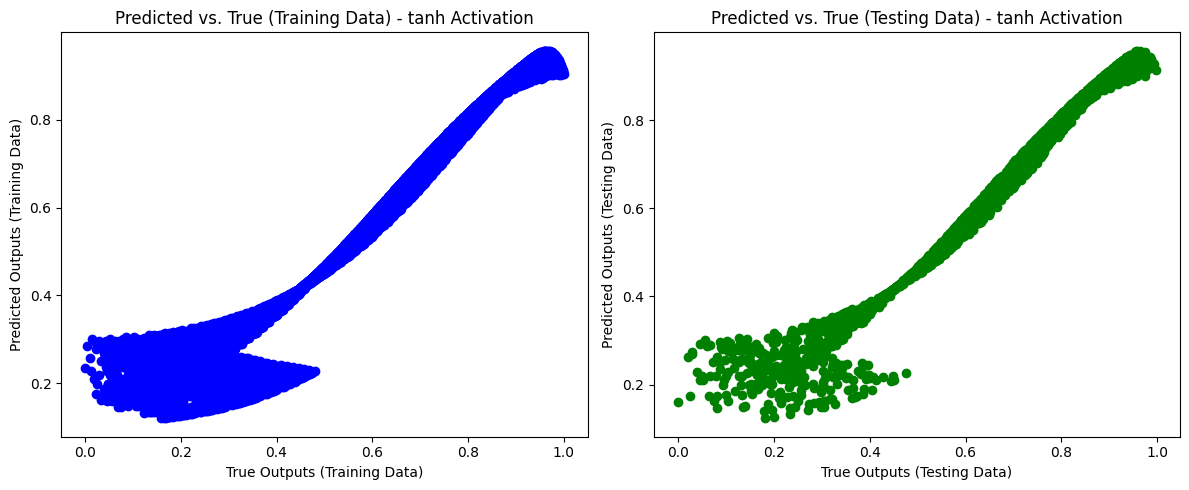

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 7/100
219/219 [=

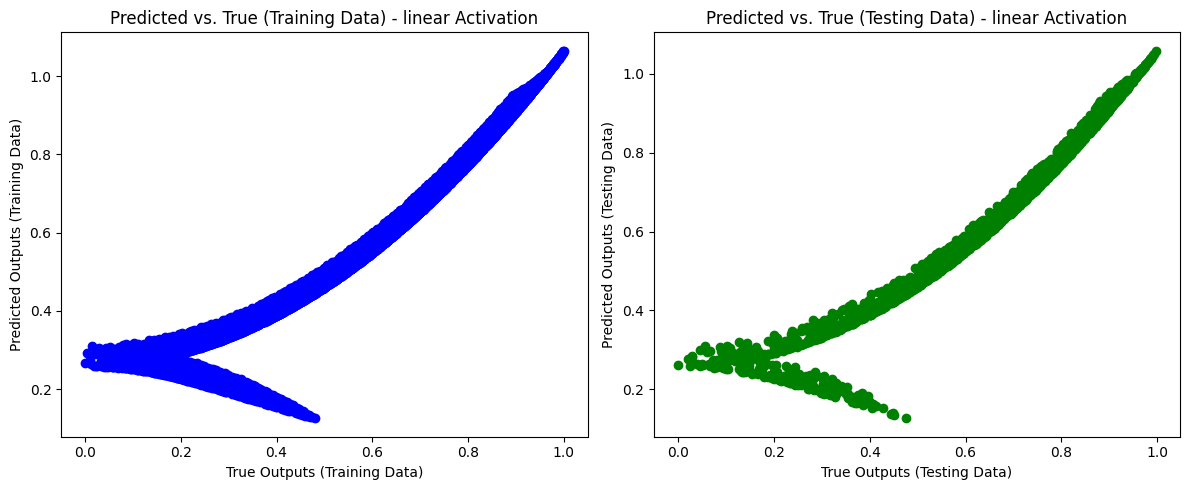

In [11]:
# Define the input shape based on your data
input_shape = X_train.shape[1]  # Replace with the appropriate input shape

# Define a list of different activation functions to experiment with
activation_functions = ['relu', 'sigmoid', 'tanh', 'linear']

# Create lists to store MSE and R-squared values for training and testing data
train_mse_list = []
train_r2_list = []
test_mse_list = []
test_r2_list = []

# Create plots to visualize how the metrics change with different activation functions
plt.figure(figsize=(12, 5))
for activation in activation_functions:
    # Create a new model with the specified activation function
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))  # Define input shape
    model.add(layers.Dense(16, activation=activation))  # Add a hidden layer
    model.add(layers.Dense(1, activation='linear'))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # Train the model with your data
    history = model.fit(X_train, Z_train, epochs=100, batch_size=32, validation_data=(X_val, Z_val))

    # Predict on training and testing data
    Z_train_pred = model.predict(X_train)
    Z_test_pred = model.predict(X_test)

    # Calculate and append MSE and R-squared values
    train_mse = mean_squared_error(Z_train, Z_train_pred)
    train_r2 = r2_score(Z_train, Z_train_pred)
    test_mse = mean_squared_error(Z_test, Z_test_pred)
    test_r2 = r2_score(Z_test, Z_test_pred)

    train_mse_list.append(train_mse)
    train_r2_list.append(train_r2)
    test_mse_list.append(test_mse)
    test_r2_list.append(test_r2)

    # Print metric values for the current configuration
    print(f"Activation Function: {activation}")
    print(f"Training MSE: {train_mse}")
    print(f"Training R-squared (R^2): {train_r2}")
    print(f"Testing MSE: {test_mse}")
    print(f"Testing R-squared (R^2): {test_r2}")
    print("\n")

    # Create scatter plots to visualize predicted vs. true output in training and testing data
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(Z_train, Z_train_pred, c='blue')
    plt.xlabel('True Outputs (Training Data)')
    plt.ylabel('Predicted Outputs (Training Data)')
    plt.title(f'Predicted vs. True (Training Data) - {activation} Activation')
    
    plt.subplot(1, 2, 2)
    plt.scatter(Z_test, Z_test_pred, c='green')
    plt.xlabel('True Outputs (Testing Data)')
    plt.ylabel('Predicted Outputs (Testing Data)')
    plt.title(f'Predicted vs. True (Testing Data) - {activation} Activation')
    
    plt.tight_layout()
    plt.show()


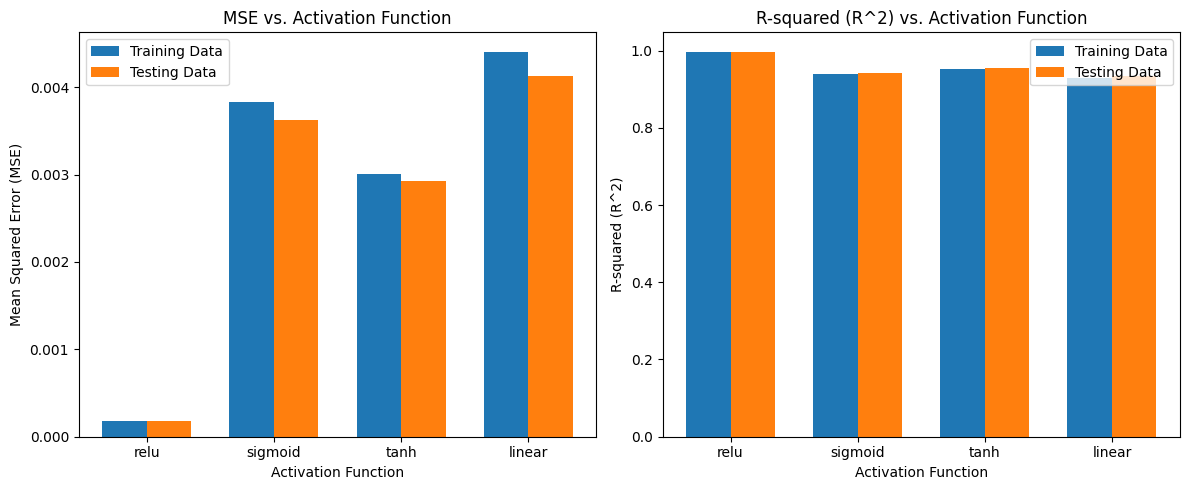

In [12]:
# Calculate the width for the bars
bar_width = 0.35
index = np.arange(len(activation_functions))

# Create plots to visualize how the metrics change with different activation functions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(index - bar_width / 2, train_mse_list, bar_width, label='Training Data')
plt.bar(index + bar_width / 2, test_mse_list, bar_width, label='Testing Data')
plt.xlabel('Activation Function')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Activation Function')
plt.xticks(index, activation_functions)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(index - bar_width / 2, train_r2_list, bar_width, label='Training Data')
plt.bar(index + bar_width / 2, test_r2_list, bar_width, label='Testing Data')
plt.xlabel('Activation Function')
plt.ylabel('R-squared (R^2)')
plt.title('R-squared (R^2) vs. Activation Function')
plt.xticks(index, activation_functions)
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
188/188 [==============================] - 2s 5ms/step - loss: 0.2139 - mean_squared_error: 0.2139 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 7/100
188/188 [=

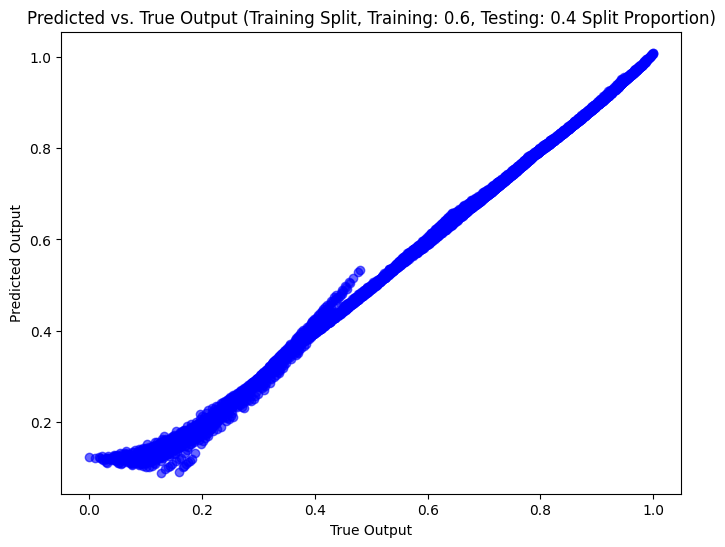

125/125 [==============================] - 0s 2ms/step


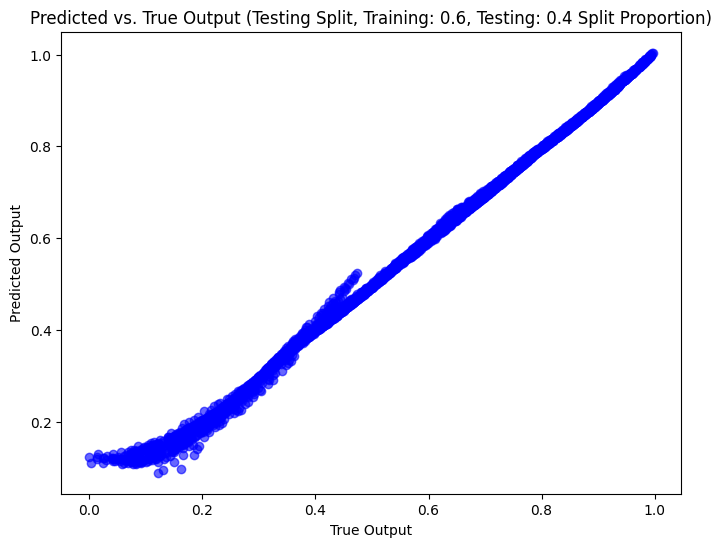

Epoch 1/100
157/157 [==============================] - 2s 6ms/step - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 7/100
157/157 [=

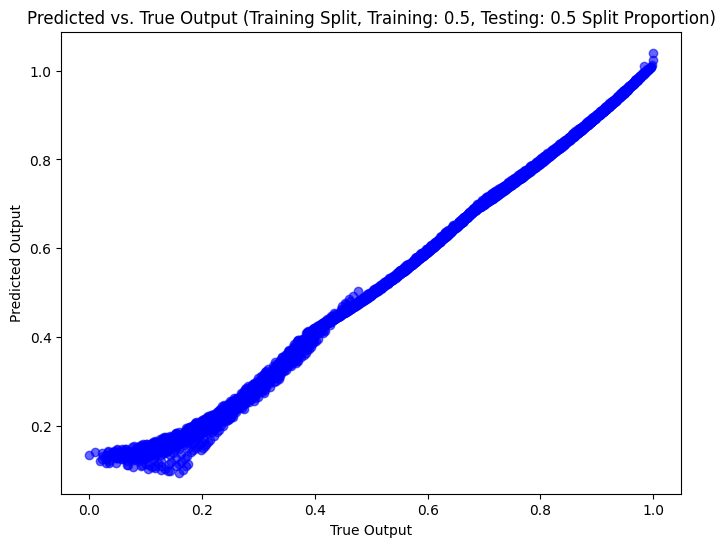

157/157 [==============================] - 0s 2ms/step


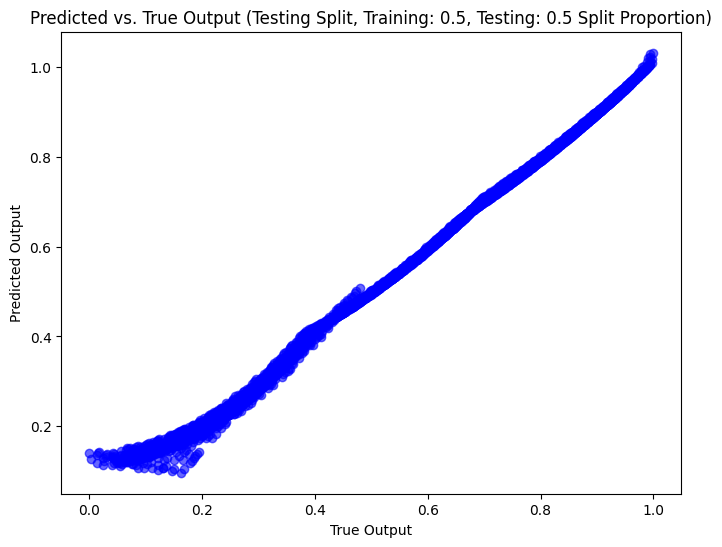

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7/100
250/250 [=

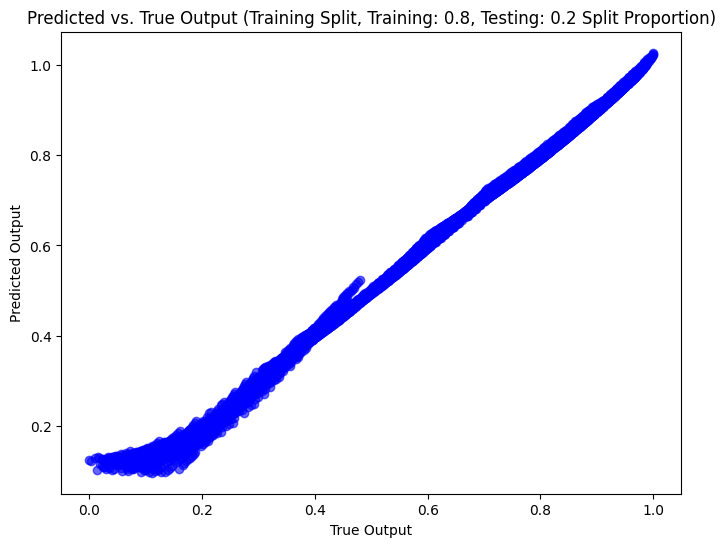

63/63 [==============================] - 0s 948us/step


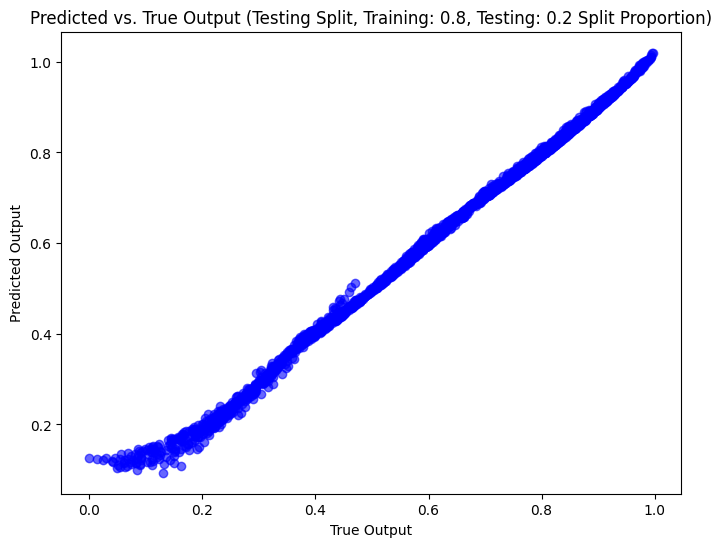

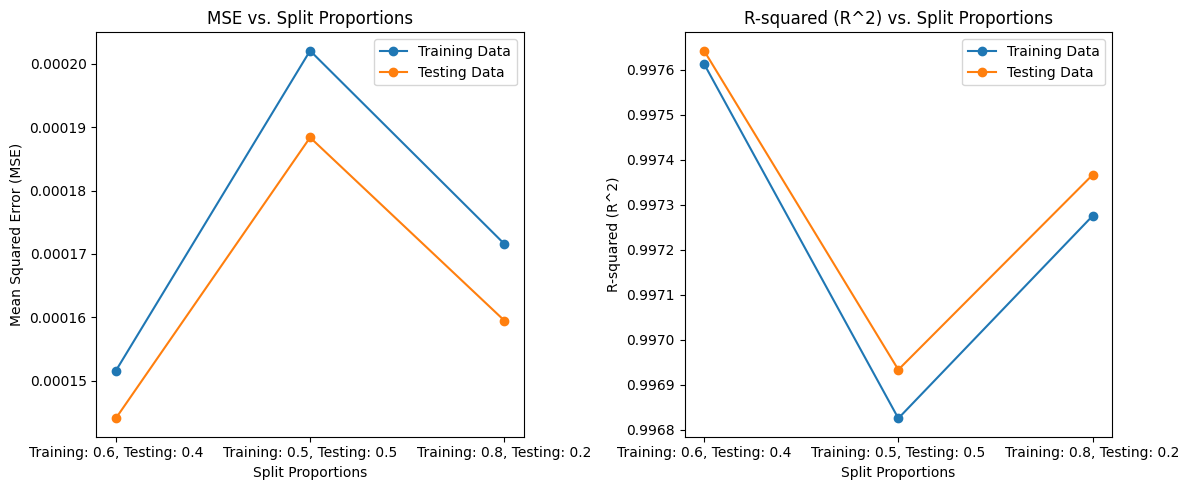

In [43]:
# Lists to store MSE and R-squared values
train_mse_list = []
train_r2_list = []
test_mse_list = []
test_r2_list = []

# Lists to store split proportions
split_proportions = []

# Define a function to create and train a neural network model
def create_and_train_model(X_train, Z_train, X_test, Z_test, num_epochs=100, num_nodes=16, activation='relu'):
    # Define the model
    model = keras.Sequential()
    model.add(layers.Input(shape=X_train.shape[1]))
    model.add(layers.Dense(num_nodes, activation=activation))
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # Train the model
    history = model.fit(X_train, Z_train, epochs=num_epochs, validation_data=(X_test, Z_test))

    # Calculate MSE and R-squared values for training and testing data
    Z_train_pred = model.predict(X_train)
    Z_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(Z_train, Z_train_pred)
    train_r2 = r2_score(Z_train, Z_train_pred)
    test_mse = mean_squared_error(Z_test, Z_test_pred)
    test_r2 = r2_score(Z_test, Z_test_pred)

    train_mse_list.append(train_mse)
    train_r2_list.append(train_r2)
    test_mse_list.append(test_mse)
    test_r2_list.append(test_r2)

    # Print the MSE and R-squared values
    print(f'Training Data - MSE: {train_mse}, R-squared: {train_r2}')
    print(f'Testing Data - MSE: {test_mse}, R-squared: {test_r2}')

    return model, history

# Define a function to plot the predicted vs. true output
def plot_predicted_vs_true_output(model, X, Z, split_type, proportion):
    Z_pred = model.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(Z, Z_pred, color='blue', alpha=0.6)
    plt.xlabel('True Output')
    plt.ylabel('Predicted Output')
    plt.title(f'Predicted vs. True Output ({split_type} Split, {proportion} Split Proportion)')
    plt.show()

# Define different split proportions for training and testing data
split_proportions = [(0.6, 0.4), (0.5, 0.5), (0.8, 0.2)]  # Example split proportions

for train_split, test_split in split_proportions:
    X_train, X_test, Z_train, Z_test = train_test_split(X_normalized, Z_normalized, test_size=test_split, random_state=42)

    model, history = create_and_train_model(X_train, Z_train, X_test, Z_test, num_epochs=100, num_nodes=16, activation='relu')

    # Print the MSE and R-squared values
    print(f'Split Proportion: Training: {train_split}, Testing: {test_split}')
    print(f'Training Data - MSE: {train_mse_list[-1]}, R-squared: {train_r2_list[-1]}')
    print(f'Testing Data - MSE: {test_mse_list[-1]}, R-squared: {test_r2_list[-1]}')

    # Plot predicted vs. true output for training data
    plot_predicted_vs_true_output(model, X_train, Z_train, 'Training', f'Training: {train_split}, Testing: {test_split}')

    # Plot predicted vs. true output for testing data
    plot_predicted_vs_true_output(model, X_test, Z_test, 'Testing', f'Training: {train_split}, Testing: {test_split}')

# Plot MSE and R-squared values vs. Split Proportions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot([f'Training: {train}, Testing: {test}' for train, test in split_proportions], train_mse_list, marker='o', label='Training Data')
plt.plot([f'Training: {train}, Testing: {test}' for train, test in split_proportions], test_mse_list, marker='o', label='Testing Data')
plt.xlabel('Split Proportions')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Split Proportions')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([f'Training: {train}, Testing: {test}' for train, test in split_proportions], train_r2_list, marker='o', label='Training Data')
plt.plot([f'Training: {train}, Testing: {test}' for train, test in split_proportions], test_r2_list, marker='o', label='Testing Data')
plt.xlabel('Split Proportions')
plt.ylabel('R-squared (R^2)')
plt.title('R-squared (R^2) vs. Split Proportions')
plt.legend()

plt.tight_layout()
plt.show()
